In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('housing[1].csv')

# Visualize data

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [46]:
df['median_house_value'] = df['median_house_value'] / 1000

In [47]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206.855817
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115.395616
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119.600000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179.700000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264.725000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [48]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

Text(0, 0.5, 'Latitude')

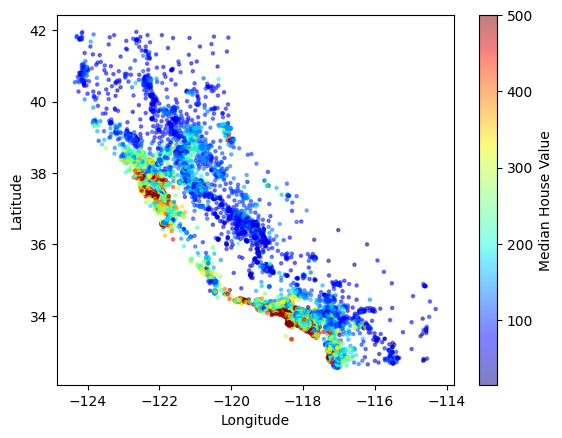

In [49]:
map = plt.scatter(df['longitude'], df['latitude'], cmap='jet', c=df['median_house_value'], s=5, alpha=0.5)
plt.colorbar(map, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [50]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [51]:
near_bay_df = df.loc[df['ocean_proximity'] == 'NEAR BAY']


Text(0.5, 1.0, 'Near Bay Houses')

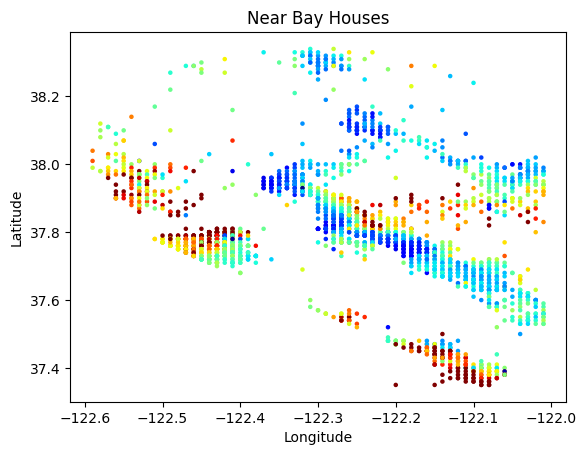

In [52]:
plt.scatter(near_bay_df['longitude'], near_bay_df['latitude'], cmap='jet', c=near_bay_df['median_house_value'], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Near Bay Houses')

In [53]:
near_ocean_df = df.loc[df['ocean_proximity'] == 'NEAR OCEAN']


Text(0.5, 1.0, 'Near Ocean Houses')

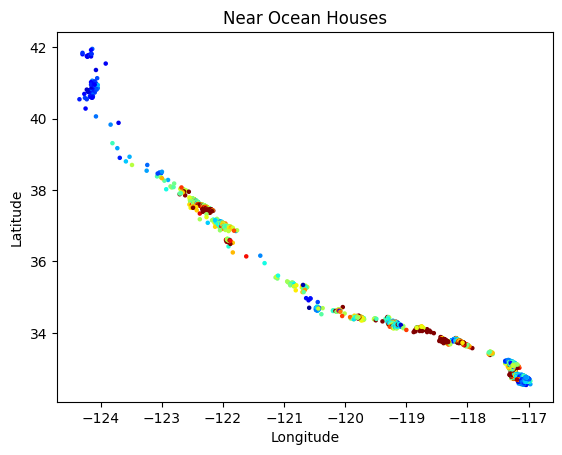

In [54]:
plt.scatter(near_ocean_df['longitude'], near_ocean_df['latitude'], cmap='jet', c=near_ocean_df['median_house_value'], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Near Ocean Houses')

In [55]:
df['ocean_proximity'].value_counts().index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

In [56]:
df['ocean_proximity'] = df['ocean_proximity'].map({'<1HR OCEAN': 2, 'INLAND': 1, 'NEAR OCEAN': 3, 'NEAR BAY': 3, 'ISLAND': 4})

In [57]:
coor_matrix = df.corr()

In [58]:
coor_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049454
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
ocean_proximity       0.553897
Name: median_house_value, dtype: float64

In [59]:
df['bedrooms_per_house'] = df['total_bedrooms'] / df['households']

In [60]:
df['rooms_per_house'] = df['total_rooms'] / df['households']

In [61]:
coor_matrix = df.corr()

In [62]:
coor_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
ocean_proximity       0.553897
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
bedrooms_per_house   -0.044265
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [63]:
df_nums = df.drop(columns='ocean_proximity').copy()

In [64]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   bedrooms_per_house  20640 non-null  float64
 10  rooms_per_house     20640 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [65]:
type(df_nums.iloc[0].shape)

tuple

# Create the model

In [ ]:
class MyLinearRegression:
    def __init__(self, lr = 0.001, iters = 1000):
        self.w = None
        self.b = None
        self.iters = iters
        self.lr = lr
    

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for i in range(self.iters):
            pred = np.dot(X, self.w) + self.b
            dw = (2 / m) * np.dot(X.T, (pred - y))
            db = (2 / m) * np.sum(pred - y)
        
            self.w -= self.lr * dw
            self.b -= self.lr * db
    
    

    def predict(self, X):
        return np.dot(X, self.w) + self.b
    
    


In [67]:
X = df_nums.drop(columns='median_house_value')
y = df_nums['median_house_value']

In [68]:
w = np.zeros(X.shape[1])
b = 0

for i in range(1):
    pred = np.dot(X, w) + b
    dw = (2 / X.shape[0]) * np.dot(X.T, pred - y)
    db = (2 / X.shape[0]) * np.sum(pred - y)
    w -= 0.001 * dw
    b -= 0.001 * db



print((np.dot(X, w) ))

[ 1270080.75296165 10121138.04273235  2076149.92413345 ...
  3406529.13011738  2760019.8840892   4293449.57863593]


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X.shape

(20640, 10)

In [72]:
model = MyLinearRegression()

In [73]:
model.fit(X_train, y_train)

C:\Users\ferhd\AppData\Local\Temp\ipykernel_10172\2672559043.py:26: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.lr * dw


KeyboardInterrupt: 

In [ ]:
model.w

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([nan, nan, nan, ..., nan, nan, nan], shape=(4128,))

In [ ]:
y_test.shape

(4128,)

In [ ]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()

In [ ]:
sk_model.fit(X_train, y_train)


LinearRegression()